In [114]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import math
import cv2
import matplotlib.pyplot as plt
import os
import seaborn as sns
#import umap
from PIL import Image
from scipy import misc
from os import listdir
from os.path import isfile, join
import numpy as np
from scipy import misc
from random import shuffle
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.utils.np_utils import to_categorical

#importing important library

In [115]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [116]:
data = '/content/drive/My Drive/dataMRI/brain_tumor_dataset'

In [117]:
print(os.listdir(data))

['no', 'yes']


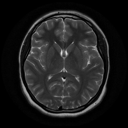

In [118]:
im =Image.open('/content/drive/My Drive/dataMRI/brain_tumor_dataset/no/1 no.jpeg').resize((128,128))
im

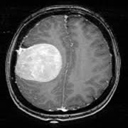

In [119]:
im =Image.open('/content/drive/My Drive/dataMRI/brain_tumor_dataset/yes/Y1.jpg').resize((128,128))
im

In [120]:
yes=os.listdir('/content/drive/My Drive/dataMRI/brain_tumor_dataset/yes')
no=os.listdir('/content/drive/My Drive/dataMRI/brain_tumor_dataset/no')
#Point to the respective folder for each clase

In [121]:
data=np.concatenate([yes,no])

#we merge our data into one variable 

In [122]:
target_x=np.full(len(yes),1)
target_y=np.full(len(no),0)
#to label the data 1 means yes and 0 means no 
data_target=np.concatenate([target_x,target_y])
#now we concatenate the result so the previous merged data have labels its all a prepartion for the training phase

In [123]:
data_target

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [124]:
len(data_target)==len(data)
#we can see that each picture in data have a label inside data_target 

True

In [125]:
yes_values=os.listdir('/content/drive/My Drive/dataMRI/brain_tumor_dataset/yes')
no_values=os.listdir('/content/drive/My Drive/dataMRI/brain_tumor_dataset/no')
#repoint to the 2 directory of our classes

In [126]:
pip install umap-learn

In [127]:
import umap.umap_ as umap

In [128]:
X_data =[]
for file in yes_values:
    #face = misc.imread('../input/brain_tumor_dataset/yes/'+file)
    img = cv2.imread('/content/drive/My Drive/dataMRI/brain_tumor_dataset/yes/'+file)
    try: 
      face = cv2.resize(img, (32, 32) ) #we resize so we can train faster
    except:
      continue
    (b, g, r)=cv2.split(face)  #to get the 3 cannels of a picture to note that open cv give the blue green red not rgb its bgr but its okey
    img=cv2.merge([r,g,b])# and we merge the three channels because they all give diffirent info so we don't want to negligate any info
    X_data.append(img) # we append them into xdata to do the trainnong just like we did with data
#print(X_data)    
#transforming the data to arrays because that what the model see just an array of values

In [129]:
#X_data =[]
for file in no_values:
    #face = misc.imread('../input/brain_tumor_dataset/yes/'+file)
    img = cv2.imread('/content/drive/My Drive/dataMRI/brain_tumor_dataset/no/'+file)
    try:
      face = cv2.resize(img, (32, 32) )
    except:
      continue
    (b, g, r)=cv2.split(face) 
    img=cv2.merge([r,g,b])
    X_data.append(img)
    
#same thing but just we will add the non value means the images that dosent contain tumor because our model need to see both images with tumors
#and images without 

In [130]:
X = np.squeeze(X_data) #the squeeze() function is used to remove single-dimensional entries from the shape of an array as you can see here https://www.w3resource.com/numpy/manipulation/squeeze.php
#omit the comments if you want to see a comparison between the two
#print(X_data[0])
#print(X[0])

In [131]:
X.shape

(253, 32, 32, 3)

In [132]:
# Normalisation des valeur
X = X.astype('float32')
X /= 255

In [133]:
#Now this is an important part where we devide our data to training set validation set and test set  note that 
#x represent the data and Y represent the label of that data that wy x_* is taken from X and y_* is taken from data_target
(x_train, y_train), (x_test, y_test) = (X[:190],data_target[:190]) , (X[190:] , data_target[190:])
(x_valid , y_valid) = (x_test[:63], y_test[:63])
#(x_test, y_test) = (x_test[63:], y_test[63:])

In [134]:
#here we define the model that we are going to train we use keras from tensor flow 
model = tf.keras.Sequential()

# Must define the input shape in the first layer of the neural network you can see that the input shape is the same as when we resized
#using open cv 
model.add(tf.keras.layers.Conv2D(filters=16,kernel_size=9, padding='same', activation='relu', input_shape=(32,32,3))) 
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.45))
#you can type in google keras.layer.dropout for more info about the layyers 
model.add(tf.keras.layers.Conv2D(filters=16,kernel_size=9,padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.25))
#you can omit coment to add a layer and you can add multiple ones so the model becom more efficient 
model.add(tf.keras.layers.Conv2D(filters=16,kernel_size=9,padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.25))

model.add(tf.keras.layers.Conv2D(filters=36, kernel_size=9, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.25))

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(512, activation='relu'))
model.add(tf.keras.layers.Dropout(0.15))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
#and search activation function in cnn because you will be asked about it or you can ask me 
#so here is our fully connected model it have 3 layers and dicision layer and here you can add or supp a layer
# Take a look at the model summary
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 32, 32, 16)        3904      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 16, 16, 16)       0         
 2D)                                                             
                                                                 
 dropout_8 (Dropout)         (None, 16, 16, 16)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 16, 16, 16)        20752     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 8, 8, 16)         0         
 2D)                                                             
                                                                 
 dropout_9 (Dropout)         (None, 8, 8, 16)         

In [135]:
model.compile(loss='binary_crossentropy',
             optimizer=tf.keras.optimizers.Adam(),
             metrics=['acc'])
#this model.compile dosen't do somthing big it just define the parameters for the model like the loss function the optimize and metrics you can lookup each one of them

In [136]:
model.fit(x_train,
         y_train,
         batch_size=128,
         epochs=150,
         validation_data=(x_valid, y_valid),)

#this one is reponsible for training you can see that we give that function the x_train(data)and y_train(labe) and the validation data
#plus the number of epochs wich represent how much are we going to train our model and it means how many time we are going to pass through our data
# The batch size is a number of samples processed before the model is updated The size of a batch must be more than or equal to one and less than or equal to the number of samples in the training dataset.

Epoch 1/150
2/2 [==============================] - 2s 466ms/step - loss: 0.6398 - acc: 0.7316 - val_loss: 1.4137 - val_acc: 0.0000e+00
Epoch 2/150
2/2 [==============================] - 1s 331ms/step - loss: 0.5088 - acc: 0.8158 - val_loss: 0.9835 - val_acc: 0.0000e+00
Epoch 3/150
2/2 [==============================] - 1s 330ms/step - loss: 0.4722 - acc: 0.8158 - val_loss: 1.0025 - val_acc: 0.0000e+00
Epoch 4/150
2/2 [==============================] - 1s 327ms/step - loss: 0.4671 - acc: 0.8158 - val_loss: 1.2541 - val_acc: 0.0000e+00
Epoch 5/150
2/2 [==============================] - 1s 492ms/step - loss: 0.4742 - acc: 0.8158 - val_loss: 1.1029 - val_acc: 0.0000e+00
Epoch 6/150
2/2 [==============================] - 1s 624ms/step - loss: 0.4570 - acc: 0.8158 - val_loss: 1.0096 - val_acc: 0.0000e+00
Epoch 7/150
2/2 [==============================] - 1s 539ms/step - loss: 0.4567 - acc: 0.8158 - val_loss: 1.1495 - val_acc: 0.0000e+00
Epoch 8/150
2/2 [==============================] - 1s 5

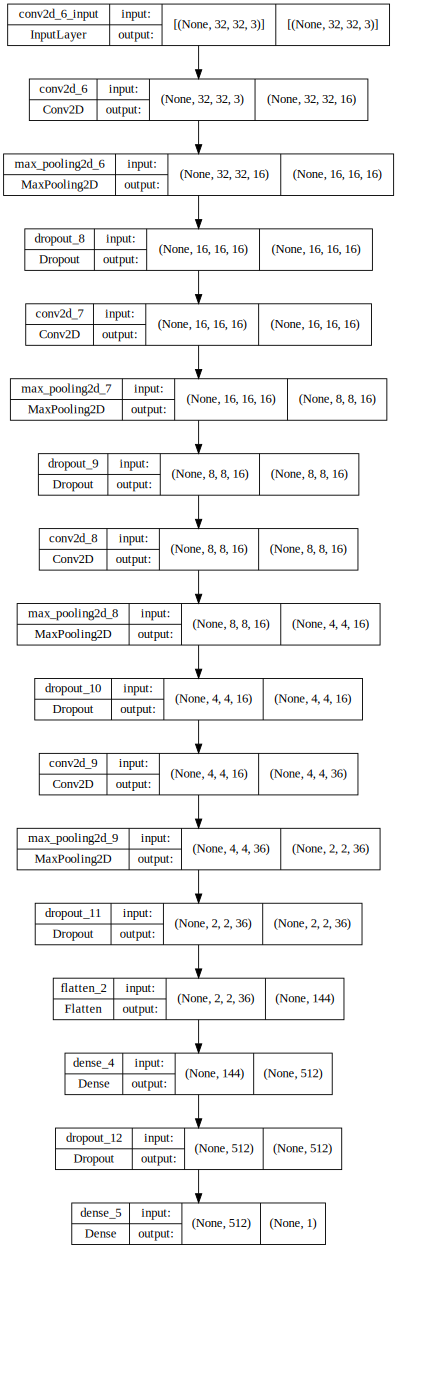

In [137]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
SVG(model_to_dot(model,show_shapes = True, dpi=65).create(prog='dot', format='svg'))
#just another way to show your model

In [138]:
# Evaluate the model on the test set we gonna see if the picture are predicted in a right way
score = model.evaluate(x_test, y_test, verbose=0)

# Print test accuracy
print('\n', 'Test accuracy:', score[1])
#you can elevate the accuracy score by just adding more to the model some more layers but its sufficient for this one 80% is a good result for a fully connect model


 Test accuracy: 0.8571428656578064


(63, 1)


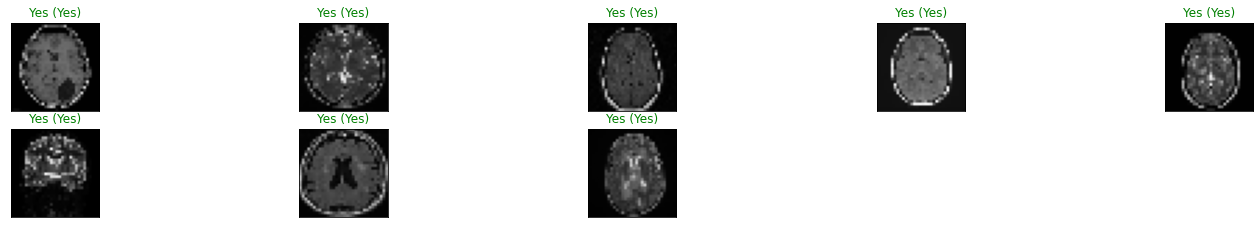

In [139]:
#here is a code to predict some sampels from the test_data so we can see if the model is doing fine to  note that the notation is like the fellowing
#the format is [prediction(label)]: the prediciton is the prediction of the model and the label is the right value of the picture from the data
labels =["Yes",  # index 0
        "No",      # index 1
        ]
y_hat = model.predict(x_test)
print(y_hat.shape)
# Plot a random sample of 8 test images, their predicted labels and ground truth
figure = plt.figure(figsize=(25, 25))
for i, index in enumerate(np.random.choice(x_test.shape[0], size=8, replace=False)):
    ax = figure.add_subplot(13, 5, i + 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(np.squeeze(x_test[index]))
    predict_index = np.argmax(y_hat[index])
    true_index = np.argmax(y_test[index])
    # Set the title for each image
    ax.set_title("{} ({})".format(labels[predict_index], 
                                  labels[true_index]),
                                  color=("green" if predict_index == true_index else "red"))
plt.show()